In [1]:
import json
import netket as nk
from matplotlib import pyplot as plt
from time import time
from pathlib import Path
from Drivers import PenaltyBasedVMC
from Utils import (plot_state_optimization, 
                   load_variational_state,
                   save_variational_state)

This notebook demonstrates the usage of Penalty Based VMC method

# Heisenberg Chain

In [2]:
vmc_path = Path('./Simulations/3-ExcitedStateVMC/HeisenbergChain')
state_path = Path('./VariationalStates/3-ExcitedStateVMC/HeisenbergChain')

In [3]:
L = 10
n_iter = 3000
n_samples = 2000
chain = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=0, N=chain.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=chain, J=1)

Exact diagonalization

In [4]:
evals = nk.exact.lanczos_ed(hamiltonian, k=30, compute_eigenvectors=False)
evals[:10]

array([-18.06178542, -16.36882939, -15.08238974, -14.1731175 ,
       -14.1731175 , -12.98465967, -12.98465967, -11.90372748,
       -11.5649444 , -11.5649444 ])

In [5]:
rbm = nk.models.RBM(alpha=1)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, preconditioner=sr, variational_state=vstate)
start = time()
gs.run(n_iter=n_iter, out=str(vmc_path/'State0'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 115.500 seconds


In [6]:
colors = ['maroon', 'darkgreen', 'blue', 'darkviolet', 'lime']
iters_list = []
optim_list = []
scatter_params = {'s': 2, 'alpha': 0.4}

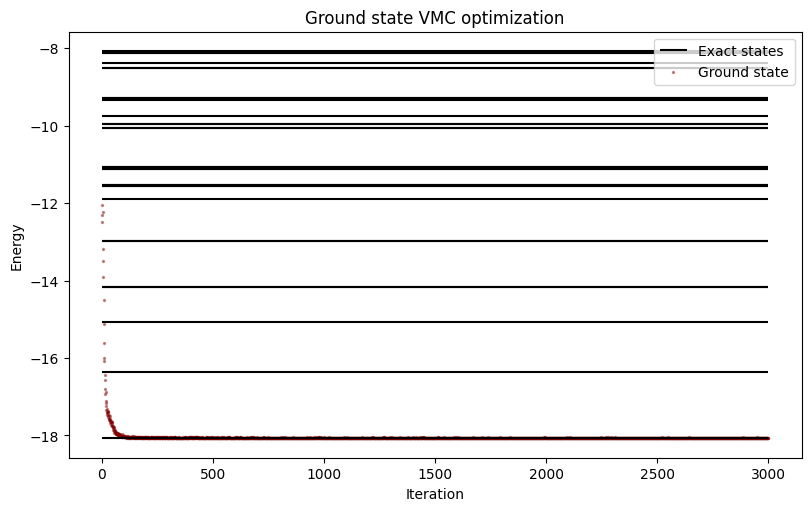

In [7]:
data_chain_gs = json.load(open(vmc_path / 'State0.log'))
iters_list.append(data_chain_gs['Energy']['iters'])
optim_list.append(data_chain_gs['Energy']['Mean'])
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
plot_state_optimization(n_iter, (iters_list, optim_list), axes, 
                        evals=evals, colors=colors, **scatter_params,
                        title='Ground state VMC optimization');

In [8]:
save_variational_state(vstate, state_path / 'State0.json')

In [9]:
rbm = nk.models.RBM(alpha=1)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
energies = [load_variational_state(state_path / 'State0.json', sampler, rbm, n_samples=n_samples)]

In [10]:
gs = PenaltyBasedVMC(hamiltonian=hamiltonian, 
                     optimizer=optimizer, 
                     preconditioner=sr, 
                     variational_state=vstate,
                     state_list=energies,
                     penalty_list=[6])
start = time()
gs.run(n_iter=n_iter, out=str(vmc_path/'State1'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 172.521 seconds


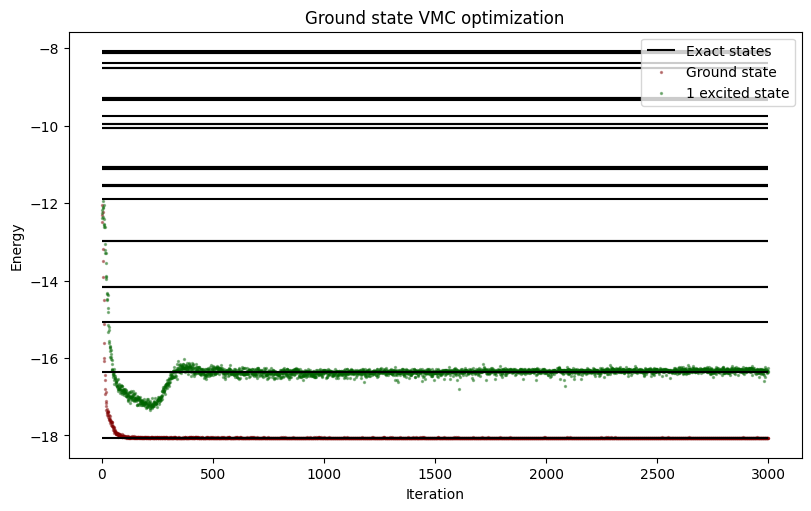

In [11]:
data_chain_1ex = json.load(open(vmc_path / 'State1.log'))
iters_list.append(data_chain_1ex['Energy']['iters'])
optim_list.append(data_chain_1ex['Energy']['Mean'])
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
plot_state_optimization(n_iter, (iters_list, optim_list), axes, 
                        evals=evals, colors=colors, **scatter_params,
                        title='Excited state with Penalty Based VMC');

In [12]:
save_variational_state(vstate, state_path / 'State1.json')

In [17]:
rbm = nk.models.RBM(alpha=1)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.01)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
energies = [load_variational_state(state_path / 'State0.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State1.json', sampler, rbm, n_samples=n_samples)]

In [18]:
gs = PenaltyBasedVMC(hamiltonian=hamiltonian, 
                     optimizer=optimizer, 
                     preconditioner=sr, 
                     variational_state=vstate,
                     state_list=energies,
                     penalty_list=[7, 6])
start = time()
gs.run(n_iter=n_iter, out=str(vmc_path/'State2'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 235.579 seconds


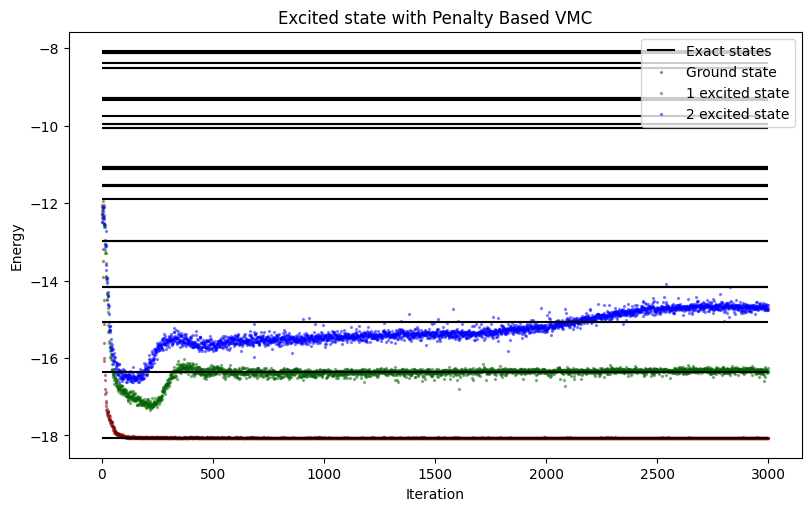

In [19]:
data_chain_2ex = json.load(open(vmc_path / 'State2.log'))
iters_list.append(data_chain_2ex['Energy']['iters'])
optim_list.append(data_chain_2ex['Energy']['Mean'])
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
plot_state_optimization(n_iter, (iters_list, optim_list), axes, 
                        evals=evals, colors=colors, **scatter_params,
                        title='Excited state with Penalty Based VMC');

In [20]:
save_variational_state(vstate, state_path / 'State2.json')

In [22]:
rbm = nk.models.RBM(alpha=1)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.02)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
energies = [load_variational_state(state_path / 'State0.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State1.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State2.json', sampler, rbm, n_samples=n_samples)]
gs = PenaltyBasedVMC(hamiltonian=hamiltonian, 
                     optimizer=optimizer, 
                     preconditioner=sr, 
                     variational_state=vstate,
                     state_list=energies,
                     penalty_list=[10, 9, 8])
start = time()
gs.run(n_iter=n_iter, out=str(vmc_path/'State3'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 285.393 seconds


In [27]:
save_variational_state(vstate, state_path / 'State3.json')

In [30]:
rbm = nk.models.RBM(alpha=1)
sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=chain)
optimizer = nk.optimizer.Sgd(learning_rate=0.02)
sr = nk.optimizer.SR(diag_shift=0.1)
vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
energies = [load_variational_state(state_path / 'State0.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State1.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State2.json', sampler, rbm, n_samples=n_samples),
            load_variational_state(state_path / 'State3.json', sampler, rbm, n_samples=n_samples)]
gs = PenaltyBasedVMC(hamiltonian=hamiltonian, 
                     optimizer=optimizer, 
                     preconditioner=sr, 
                     variational_state=vstate,
                     state_list=energies,
                     penalty_list=[13, 13, 13, 13])
start = time()
gs.run(n_iter=n_iter, out=str(vmc_path/'State4'))
print(f'Time: {time()-start:.3f} seconds')

  0%|          | 0/3000 [00:00<?, ?it/s]

Time: 332.721 seconds


In [31]:
save_variational_state(vstate, state_path / 'State4.json')

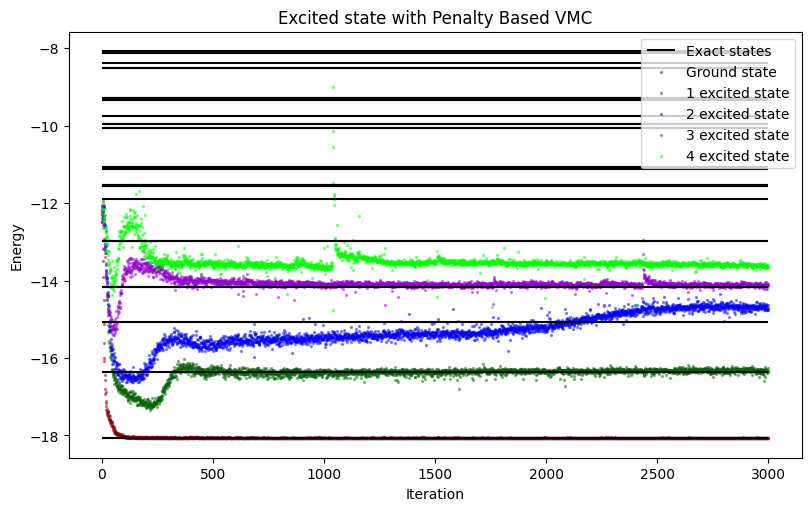

In [32]:
data_chain_3ex = json.load(open(vmc_path / 'State3.log'))
iters_list.append(data_chain_3ex['Energy']['iters'])
optim_list.append(data_chain_3ex['Energy']['Mean'])
data_chain_4ex = json.load(open(vmc_path / 'State4.log'))
iters_list.append(data_chain_4ex['Energy']['iters'])
optim_list.append(data_chain_4ex['Energy']['Mean'])
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
plot_state_optimization(n_iter, (iters_list, optim_list), axes, 
                        evals=evals, colors=colors, **scatter_params,
                        title='Excited state with Penalty Based VMC');

In [33]:
evals[:6]

array([-18.06178542, -16.36882939, -15.08238974, -14.1731175 ,
       -14.1731175 , -12.98465967])